In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd
from astropy import constants as const

x=np.arange(4000,7000,0.001)
t_x = np.arange(4000,7000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2) 
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

warng pyCloudy config: pyCloudy works better with matplotlib Triangulation


In [2]:
NGC6741_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
NGC6884_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
NGC6886_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
NGC6881_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
H4_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/H_4_1.txt"
Hen2_447_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hen_2_447.txt"
Hu2_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hu_2_1.txt"
J900_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/J_900.txt"
M1_8_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/M_1_8.txt"
NGC2346_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2346.txt"
NGC2392_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2392.txt"
NGC3242_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_3242.txt"

In [3]:
cc = const.c.to(u.km/u.s).value
def FWHM_to_sig (FWHM_v,lam_c):
    sig_lam = (FWHM_v/ cc)*(lam_c/(2*np.sqrt(2*np.log(2))))
    return sig_lam
                

In [4]:
direct = r"/home/jin/cloudy_Test/parameters"



files = os.listdir(direct)

txt_files = [file for file in files if file.endswith('result.txt')]
txt_files_parameter = [file for file in files if file.endswith('params.txt')]

parameters_names = []
for file in txt_files:

    parts = file.split('_')

    if len(parts) > 1 and parts[1] == 's':
        parameters_name = parts[0] + parts[1]
    else:
        parameters_name = parts[0]
    
    parameters_names.append(parameters_name)

print(parameters_names)

['Hen2-447', 'NGC6886s', 'NGC2346', 'NGC6886', 'NGC6881', 'M1-8', 'NGC2392', 'Hu2-1s', 'H4-1', 'Hu2-1', 'NGC2392s', 'NGC6884', 'NGC3242', 'J900', 'J900s', 'NGC6741', 'NGC3242s']


In [5]:
for ii , name in enumerate(parameters_names):
    direct_r = direct + '/' + txt_files[ii]
    direct_p = direct + '/' + txt_files_parameter[ii]
    name_w = name.replace('-', '_')
    
    globals()[f'paramter_{name_w}']= pd.read_csv(direct_r,sep='\,',header=0,engine='python')
    globals()[f're_para{name_w}']= pd.read_csv(direct_p,sep='\,',header=0,engine='python')


    globals()[f'Model_lam_{name_w}'] = globals()[f'paramter_{name_w}']['Wavelength'].to_numpy()
    globals()[f'Model_flux_{name_w}'] = globals()[f'paramter_{name_w}']['Flux'].to_numpy()

    globals()[f'F_c_{name_w}'] = globals()[f'paramter_{name_w}']['Continuum_Model'].to_numpy()

    globals()[f'F_6527_{name_w}'] = globals()[f'paramter_{name_w}']['HeII_6527_Model'].to_numpy()
    globals()[f'F_6545_{name_w}'] = globals()[f'paramter_{name_w}']['Raman_HeII_6545_Model'].to_numpy()   

    globals()[f'F_6560_{name_w}'] = globals()[f'paramter_{name_w}']['He_6560_Model'].to_numpy()
    globals()[f'F_6563_{name_w}'] = globals()[f'paramter_{name_w}']['Ha_6563_Model'].to_numpy()
    globals()[f'F_6548_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_1_Model'].to_numpy()
    globals()[f'F_6548_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_2_Model'].to_numpy()

    globals()[f'F_6584_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6584_1_Model'].to_numpy()
    globals()[f'F_6584_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6584_2_Model'].to_numpy()

    globals()[f'F_6527_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[0]
    globals()[f'F_6545_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[1]   

    globals()[f'F_6560_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[2]
    globals()[f'F_6563_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[3]
    globals()[f'F_6548_1_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[4]
    globals()[f'F_6548_2_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[5]

    globals()[f'F_6584_1_sig_{name_w}'] = globals()[f're_para{name_w}'][' Sigma'].to_numpy()[6]
    globals()[f'F_6584_2_sig_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[7]


    
    globals()[f'F_6527_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[0]
    globals()[f'F_6545_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[1]  

    globals()[f'F_6560_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[2]
    globals()[f'F_6563_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[3]
    globals()[f'F_6548_1_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Center'].to_numpy()[4]
    globals()[f'F_6548_2_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[5]

    globals()[f'F_6584_1_lam_{name_w}'] = globals()[f're_para{name_w}'][' Center'].to_numpy()[6]
    globals()[f'F_6584_2_lam_{name_w}'] =  globals()[f're_para{name_w}'][' Sigma'].to_numpy()[7]


1.58943715154104


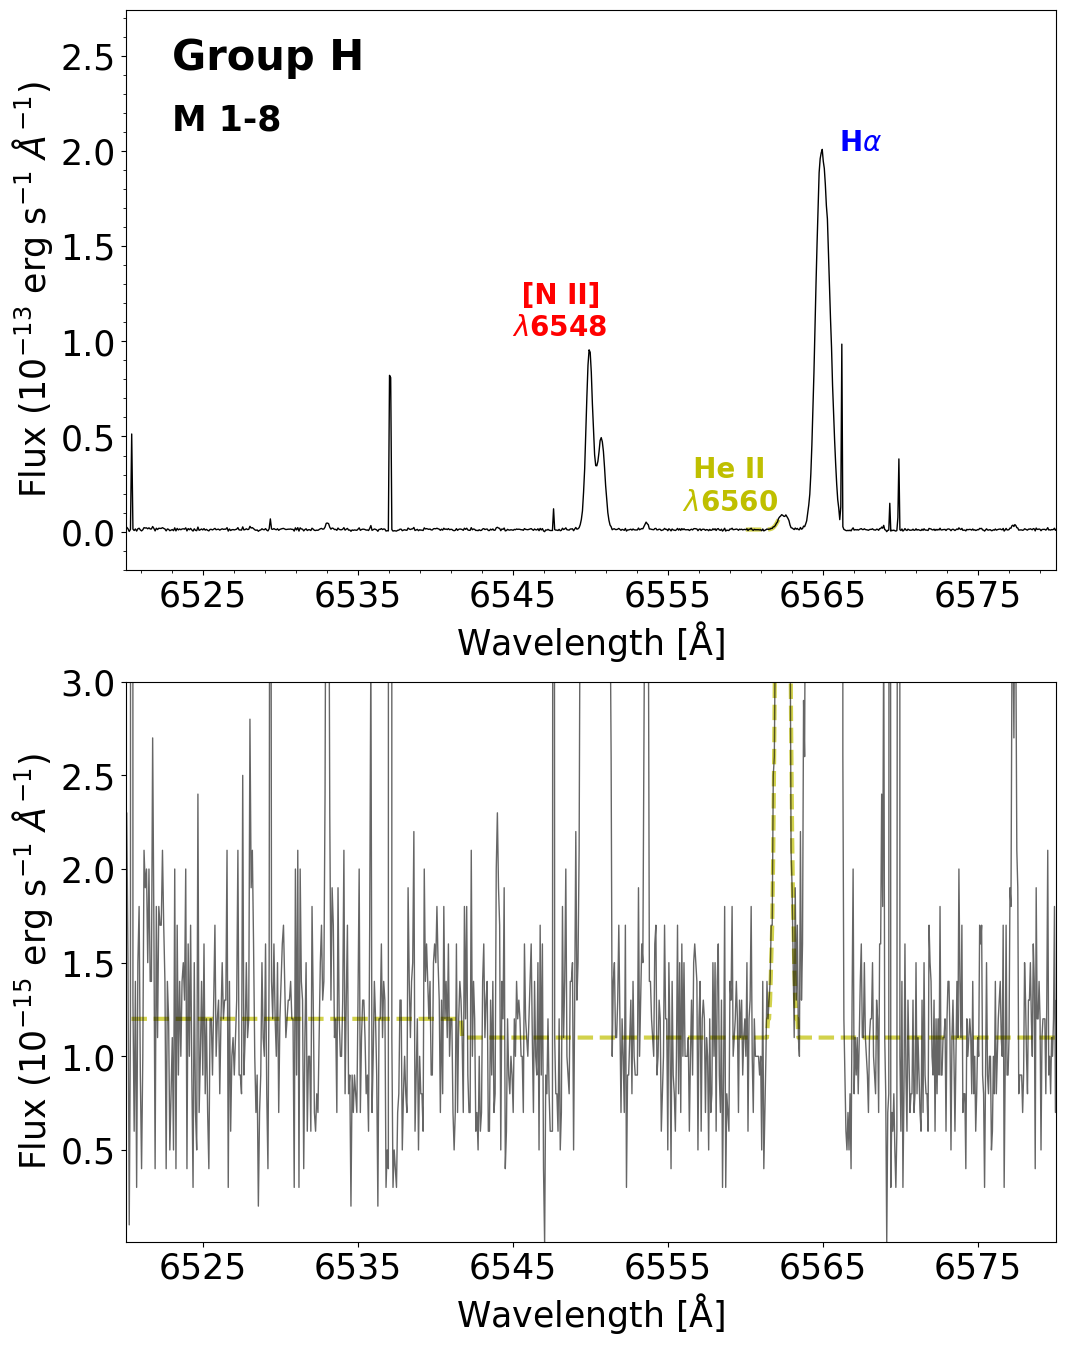

In [6]:
fig = plt.figure(1,figsize=(12,16))


plt.subplot(211)
name = 'M1_8'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*10

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*10

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*10+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*10  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*10+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*10 + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*10 + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*10 + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*10 + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*10 + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=20,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=20,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(1.1),' [N II]\n$\lambda$6548',size=20,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-13}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.2,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
plt.yticks(fontsize=25)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,'Group H',size=30,fontweight='bold')
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.0,'M 1-8',size=25,fontweight='bold')

plt.subplot(212)

factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g-',alpha=0.4,lw=10)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6560_{name}']/normal,'y--',alpha=0.7,lw=3)



# Noise_level =globals()[f'F_c_{name}'] + (1.44e-15 * 1e12 *factor )*1/3 # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k',linestyle='--',lw=3)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-,2.5,'  He II \n$\lambda$6560',size=15,fontweight='bold',color='y')

F_6560 =8.20E-15 * 1e12* factor
lam_6527 =6529.39
F_6560_sig = 0.3
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
# plt.plot(globals()[f'Model_lam_{name}'][x_6527], fit_6527[x_6527],'g-',alpha=0.5,lw=3)
print(fit_6527.max())


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-15}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(1e-2,3)
plt.yticks(fontsize=25)


# plt.legend(fontsize=20)
plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_no_6527_Verti_x.png',bbox_inches='tight')

1.58943715154104


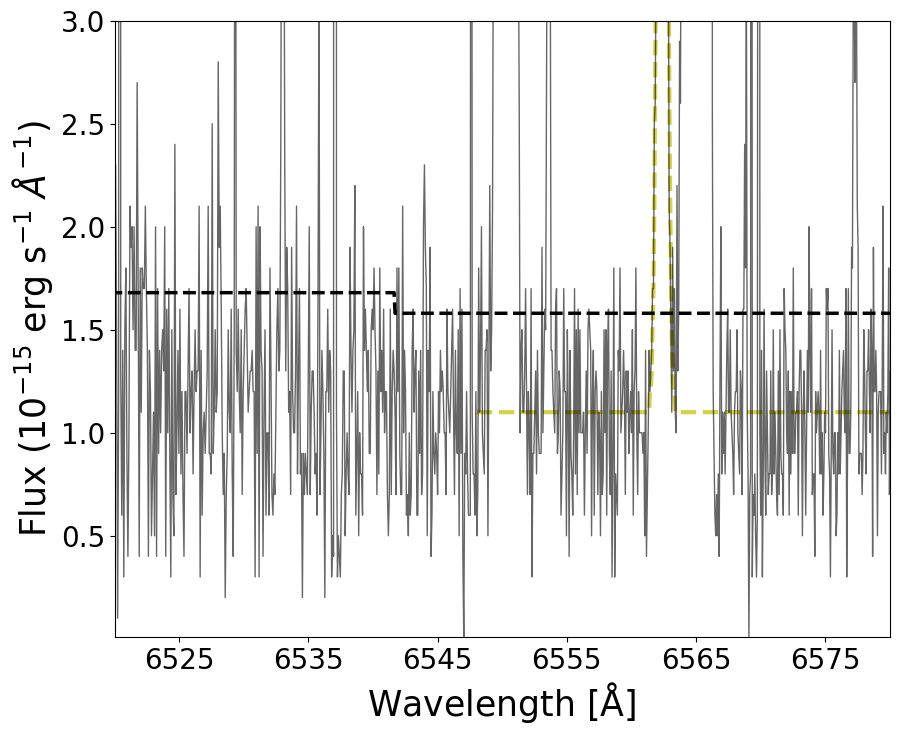

In [7]:
fig = plt.figure(1,figsize=(10,8))
name = 'M1_8'
factor = 1000
factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g-',alpha=0.4,lw=10)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



Noise_level =globals()[f'F_c_{name}'] + (1.44e-15 * 1e12 *factor )*1/3 # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k',linestyle='--',lw=2.5)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# x_p = np.argmax(globals()[f'F_6527_{name}'])
# y_label = globals()[f'F_6527_{name}'].max() /normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')

F_6560 =8.20E-15 * 1e12* factor
lam_6527 =6529.39
F_6560_sig = 0.3
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
# plt.plot(globals()[f'Model_lam_{name}'][x_6527], fit_6527[x_6527],'g-',alpha=0.9,lw=3)
print(fit_6527.max())


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-15}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(1e-2,3)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_no_6527.pdf',bbox_inches='tight')

4.819951635716241


(array([1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7')])

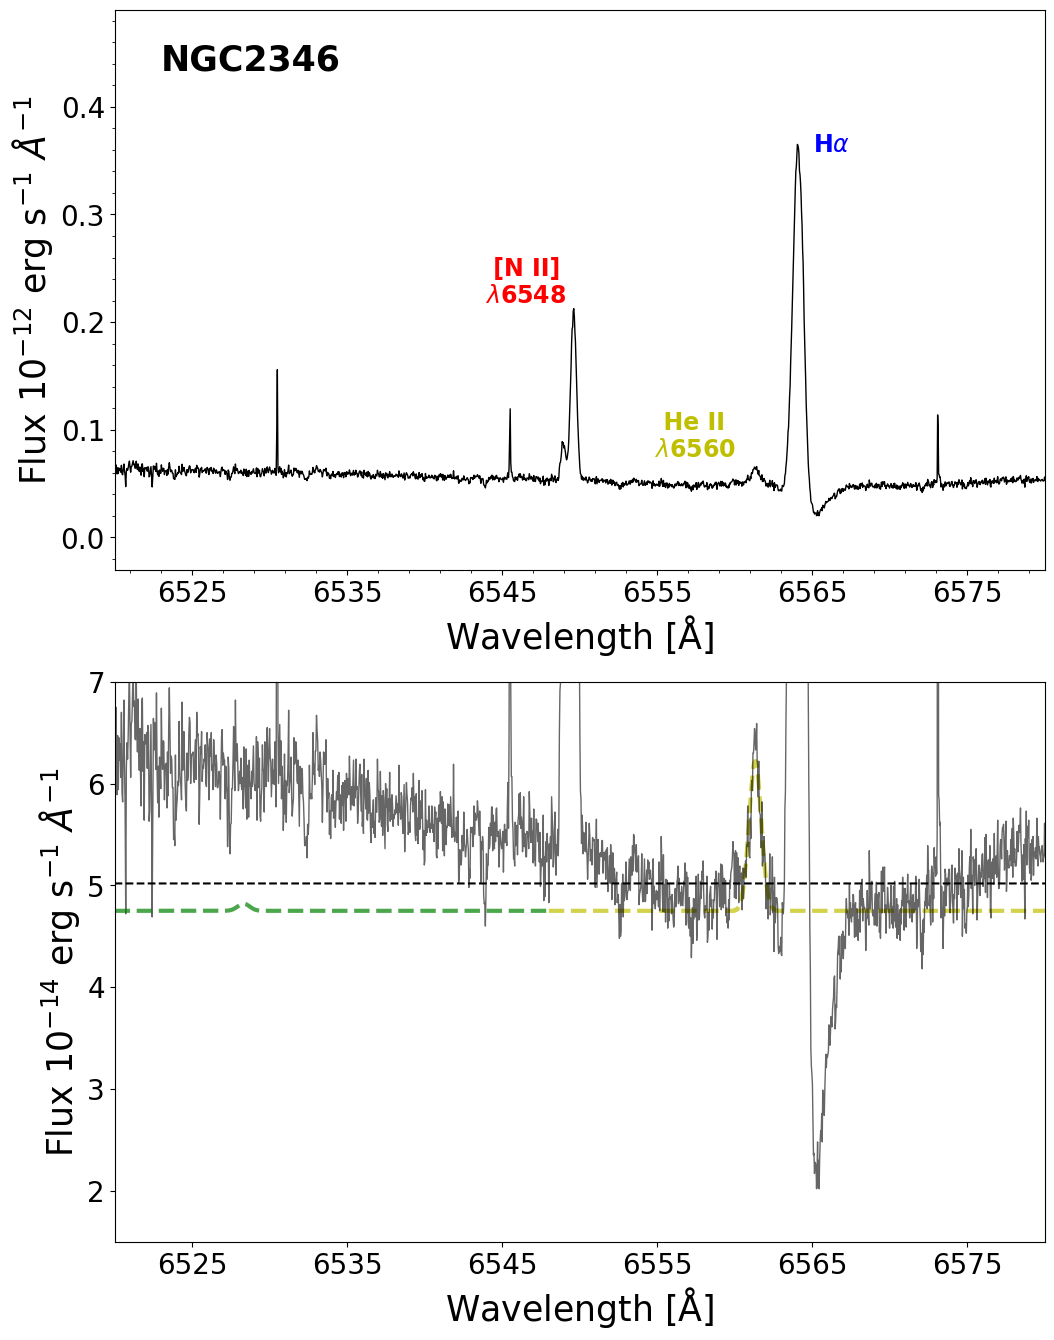

In [8]:
fig = plt.figure(1,figsize=(12,16))


plt.subplot(211)
name = 'NGC2346'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(2.5),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.03,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.6,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



Noise_level =globals()[f'F_c_{name}'] + (8.06e-15 * 1e12 *factor ) /3 # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}'],'k-',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

F_6560 =1.47E-14* 1e12* factor
lam_6527 =6528.32
F_6560_sig = 0.39
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
plt.plot(globals()[f'Model_lam_{name}'][x_6527], fit_6527[x_6527],'g--',alpha=0.7,lw=3)
print(fit_6527.max())

x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
plt.ylim(1.5,7)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}f5.png',bbox_inches='tight')

4.819951635716241
6.403806786909937


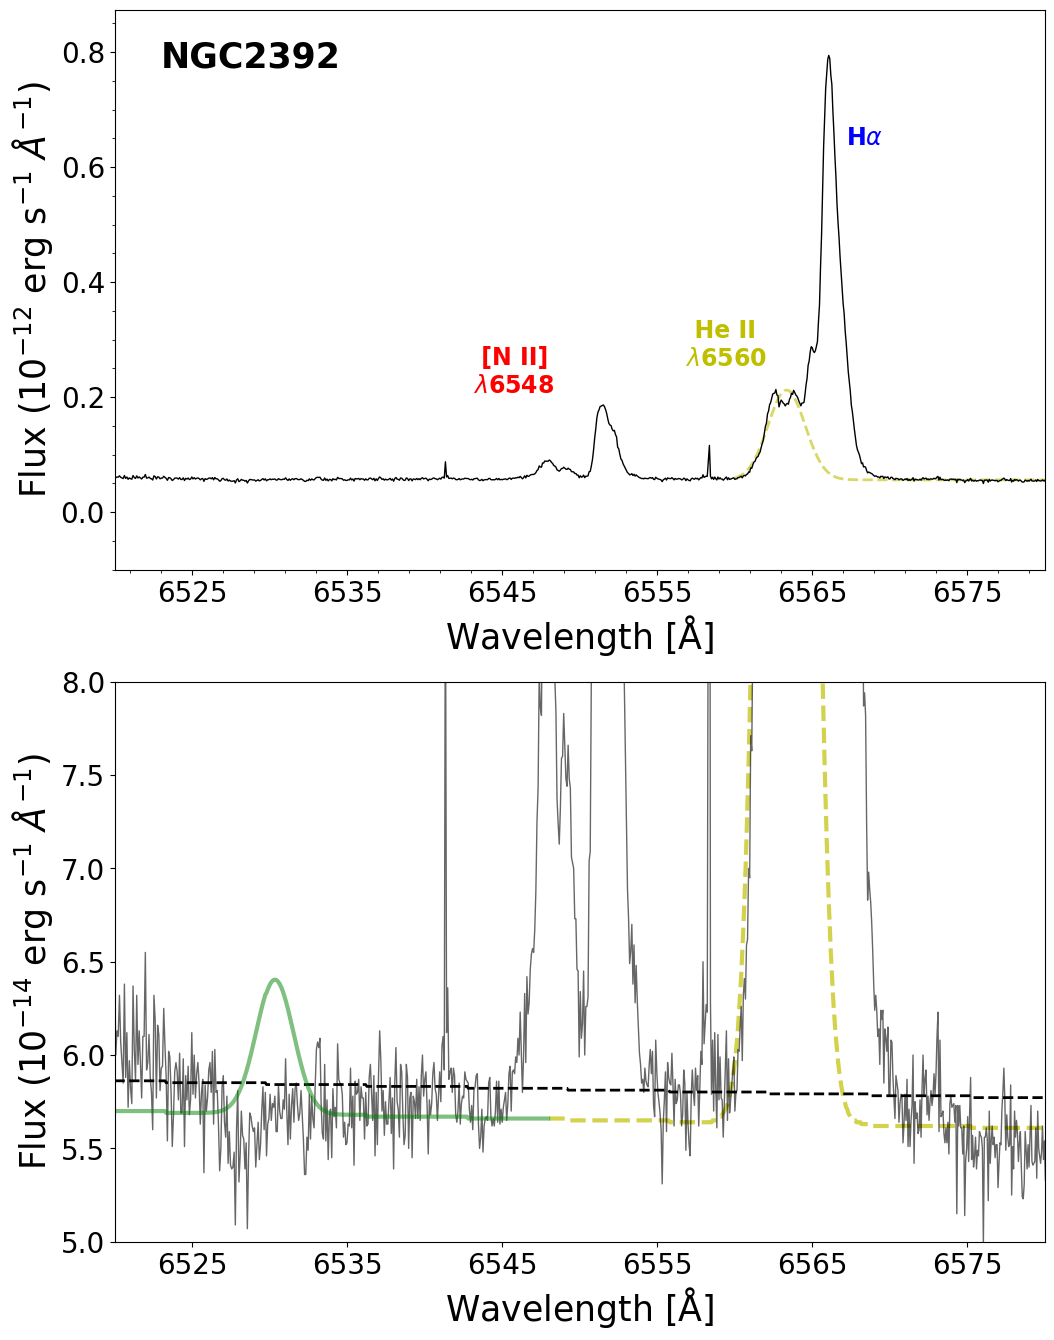

In [9]:
fig = plt.figure(1,figsize=(12,16))


plt.subplot(211)
name = 'NGC2392'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6580.3))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.6,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(2.5),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-0.1,globals()[f'F_6563_{name}'].max()*1.3)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
plt.yticks(fontsize=20)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.6,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



Noise_level =globals()[f'F_c_{name}'] + (4.86e-15 * 1e12 *factor ) / 3 # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k',linestyle='--',lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# F_6560 =1.56E-13 / 5 * 1e12* factor
# lam_6527 =6530.34
# F_6560_sig = 1.20
# F_6527 = F_6560 / 21
# fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
# plt.plot(globals()[f'Model_lam_{name}'], fit_6527,'g-',alpha=1,label='F6560/F6527 = 21 with 5 times less')
print(fit_6527.max())
F_6560 =1.52E-13 * 1e12* factor
lam_6527 =6530.34
F_6560_sig = 1.20
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
plt.plot(globals()[f'Model_lam_{name}'][x_6527], fit_6527[x_6527],'g-',alpha=0.5,lw=3)
print(fit_6527.max())

x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(5,8)
plt.yticks(fontsize=20)


# plt.legend(fontsize=20)
plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_strange_no_6527.png',bbox_inches='tight')

3.877340399332876


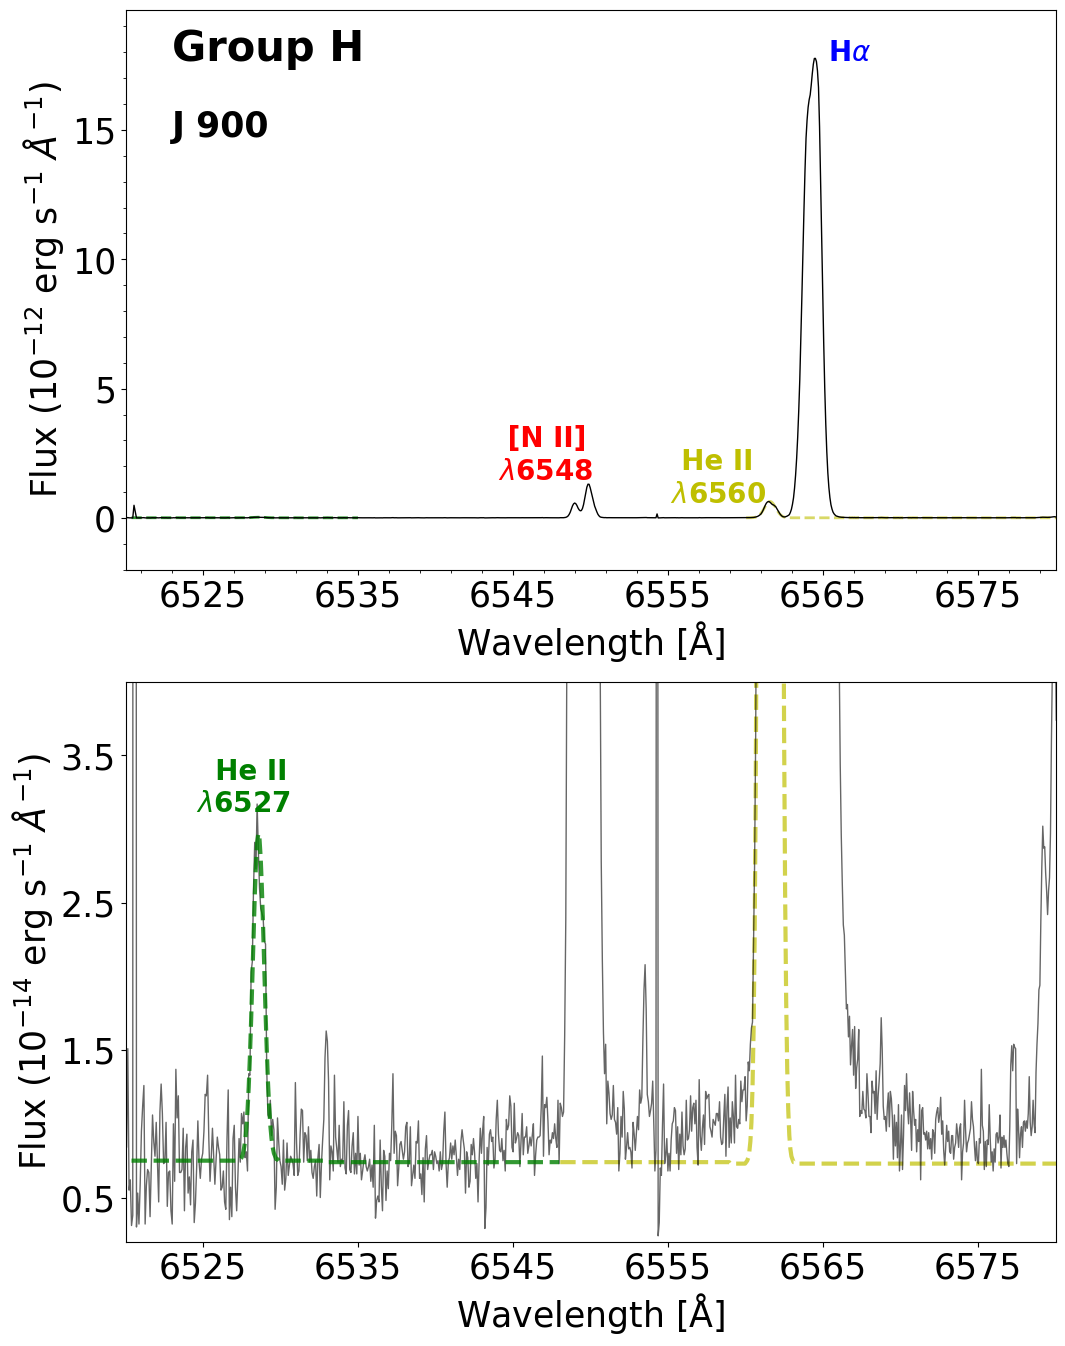

In [10]:
fig = plt.figure(1,figsize=(12,16))


plt.subplot(211)
name = 'J900'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

normal = 1

x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6580.3))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.6,lw=2)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6560_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-7,y_label*(0.95),'  He II \n $\lambda$6560 ',size=20,fontweight='bold',color='y',alpha=1)

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6563_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 1,y_label*(0.90),r'H$\alpha$',size=20,fontweight='bold',color='b')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6548_1_{name}'].max()/normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-5,y_label*(2.5),' [N II]\n$\lambda$6548',size=20,fontweight='bold',color='r')


lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )
# plt.ylabel(fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-12}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.ylim(-2,globals()[f'F_6563_{name}'].max())
plt.xticks(np.arange(6525,6585,10),fontsize=25)
plt.yticks([0.0,5.0,10.0,15.0],fontsize=25)
# plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.minorticks_on()
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*0.9,'Group H',size=30,fontweight='bold')
plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*0.75,'J 900',size=25,fontweight='bold')

plt.subplot(212)

factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]


x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



Noise_level =globals()[f'F_c_{name}'] + (4.63e-15 * 1e12 *factor ) / 3 # 3sigma




plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}'],'k',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

F_6560 =6.57E-13 * 1e12 * factor 
lam_6527 =6528.57
F_6560_sig = 0.36
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
# plt.plot(globals()[f'Model_lam_{name}'][x_6527 ], fit_6527[x_6527 ],'g-',alpha=0.5,lw=2)
x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max() /normal
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=20,fontweight='bold',color='g')
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=3)
print(fit_6527.max())
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k',linestyle='--',lw=3)
x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=25)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(0.2,4)
plt.yticks([0.5,1.5,2.5,3.5],fontsize=25)


# plt.legend(fontsize=20)
plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_yes_6527_Verti_x.png',bbox_inches='tight')

In [11]:
# fig = plt.figure(1,figsize=(12,16))


# plt.subplot(211)
# name = 'Hu2_1'
# globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
# globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']

# globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']

# globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']+ globals()[f'F_c_{name}']
# globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']  +globals()[f'F_c_{name}']

# globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']+globals()[f'F_c_{name}']
# globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'] + globals()[f'F_c_{name}']
# globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'] + globals()[f'F_c_{name}']
# globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'] + globals()[f'F_c_{name}']
# globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model'] + globals()[f'F_c_{name}']
# globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model'] + globals()[f'F_c_{name}']

# normal = 1

# # x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6535)[0]
# # plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.8,lw=2)

# # x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6560)&(globals()[f'Model_lam_{name}'] <= 6562.3))[0]
# # plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.8,lw=2)



# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=1,lw=1)


# # x_p = np.argmax(globals()[f'F_6560_{name}'])
# # y_label = globals()[f'F_6560_{name}'].max()/normal
# # x_label = globals()[f'Model_lam_{name}'][x_p]
# # plt.text(x_label-7,y_label*(1.2),'  He II \n $\lambda$6560 ',size=17,fontweight='bold',color='y',alpha=1)

# x_p = np.argmax(globals()[f'F_6563_{name}'])
# y_label = globals()[f'F_6563_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label + 1,y_label*(0.95),r'H$\alpha$',size=17,fontweight='bold',color='b')

# x_p = np.argmax(globals()[f'F_6548_1_{name}'])
# y_label = globals()[f'F_6548_1_{name}'].max()/normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-5,y_label*(1.1),' [N II]\n$\lambda$6548',size=17,fontweight='bold',color='r')


# lam_0_6527= 6527.1
# lam_0_6545 = 6544.7
# del_lam = (lam_0_6545 - lam_0_6527 )
# # plt.ylabel(fontsize=25)
# plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
# plt.ylabel(r'Flux $10^{-12}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
# x_min,x_max = 6520,6580
# plt.xlim(x_min,x_max)
# plt.ylim(-1,globals()[f'F_6563_{name}'].max()*1.3)
# plt.xticks(np.arange(6525,6585,10),fontsize=20)
# plt.yticks(fontsize=20)
# # plt.yticks([0.2,0.4,0.6,0.8,1.0],fontsize=20)
# plt.minorticks_on()
# plt.text(x_min+3,globals()[f'F_6563_{name}'].max()*1.15,f'{name}',size=25,fontweight='bold')

# plt.subplot(212)

# factor = 100
# globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
# globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

# globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

# globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
# globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

# globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
# globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
# globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
# globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
# globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
# globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



# x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g-',alpha=0.7,lw=2)

# x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y-',alpha=0.7,lw=2)



# Noise_level =globals()[f'F_c_{name}'] + (2.84e-15 * 1e12 *factor ) # 3sigma
# plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k--' )



# plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k--',alpha=0.6,lw=1)

# plt.xlim(x_min,x_max)

# F_6560 =9.65E-14 * 1e12* factor
# lam_6560 =6527.07
# F_6560_sig = 0.06
# F_6527 = F_6560 / 21
# fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6560,F_6560_sig, globals()[f'F_c_{name}'] ) 
# plt.plot(globals()[f'Model_lam_{name}'], fit_6527,'g--',alpha=0.4)



# x_min,x_max = 6520,6580
# plt.xlim(x_min,x_max)
# plt.xticks(np.arange(6525,6585,10),fontsize=20)
# y_max = globals()[f'F_6527_{name}'].max()/normal

# plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
# plt.ylabel(r'Flux $10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$',fontsize=25)
# plt.ylim(1.0,3*globals()[f'F_6563_{name}'].max()/1000)
# plt.yticks(fontsize=20)


# # plt.legend(fontsize=20)
# # plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/BOES_{name}_version_2.png',bbox_inches='tight')

1.58943715154104


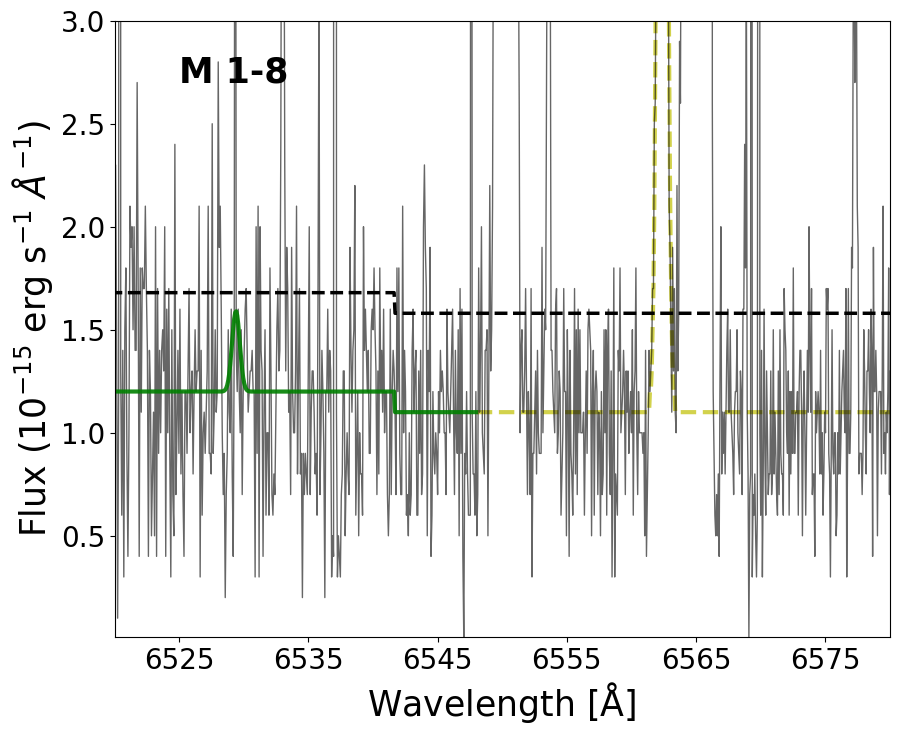

In [12]:
fig = plt.figure(1,figsize=(10,8))
name = 'M1_8'
factor = 1000
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g-',alpha=0.4,lw=10)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



Noise_level =globals()[f'F_c_{name}'] + (1.44e-15 * 1e12 *factor )*1/3 # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k',linestyle='--',lw=2.5)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}']/normal,'k-',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# x_p = np.argmax(globals()[f'F_6527_{name}'])
# y_label = globals()[f'F_6527_{name}'].max() /normal
# x_label = globals()[f'Model_lam_{name}'][x_p]
# plt.text(x_label-4,y_label*(1.05),'  He II \n$\lambda$6527',size=15,fontweight='bold',color='g')

F_6560 =8.20E-15 * 1e12* factor
lam_6527 =6529.39
F_6560_sig = 0.3
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
plt.plot(globals()[f'Model_lam_{name}'][x_6527], fit_6527[x_6527],'g-',alpha=0.9,lw=3)
print(fit_6527.max())


x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-15}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(1e-2,3)
plt.yticks(fontsize=20)

plt.text(6525,3*0.9,'M 1-8',size=25,fontweight='bold')
plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_no_6527.pdf',bbox_inches='tight')



1.58943715154104
6.422854333933882


Text(6525, 7.76, 'NGC2392')

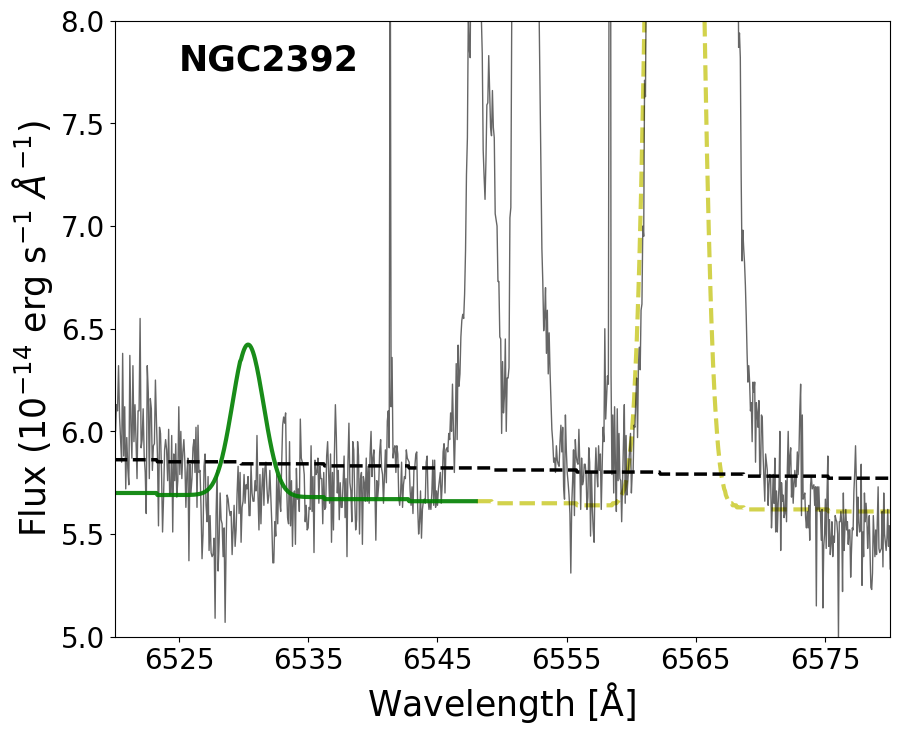

In [13]:
fig = plt.figure(1,figsize=(10,8))


name = 'NGC2392'
factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
# plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.6,lw=2)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



Noise_level =globals()[f'F_c_{name}'] + (4.86e-15 * 1e12 *factor ) / 3 # 3sigma




plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}'],'k-',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

F_6560 =1.56E-13 / 5 * 1e12* factor
lam_6527 =6530.34
F_6560_sig = 1.20
F_6527 = F_6560 / 21
# fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
# plt.plot(globals()[f'Model_lam_{name}'], fit_6527,'g-',alpha=1,label='F6560/F6527 = 21 with 5 times less')
print(fit_6527.max())
F_6560 =1.56E-13 * 1e12* factor
lam_6527 =6530.34
F_6560_sig = 1.20
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
plt.plot(globals()[f'Model_lam_{name}'][x_6527], fit_6527[x_6527],'g-',alpha=0.9,lw=3)
print(fit_6527.max())

x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k',linestyle='--',lw=2.5)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(5,8)
plt.yticks(fontsize=20)

plt.text(6525,8*0.97,'NGC2392',size=25,fontweight='bold')
# plt.legend(loc='upper right',fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_strange_6527.pdf',bbox_inches='tight')

1.1374320570090912


Text(6524, 1.35, 'NGC3242')

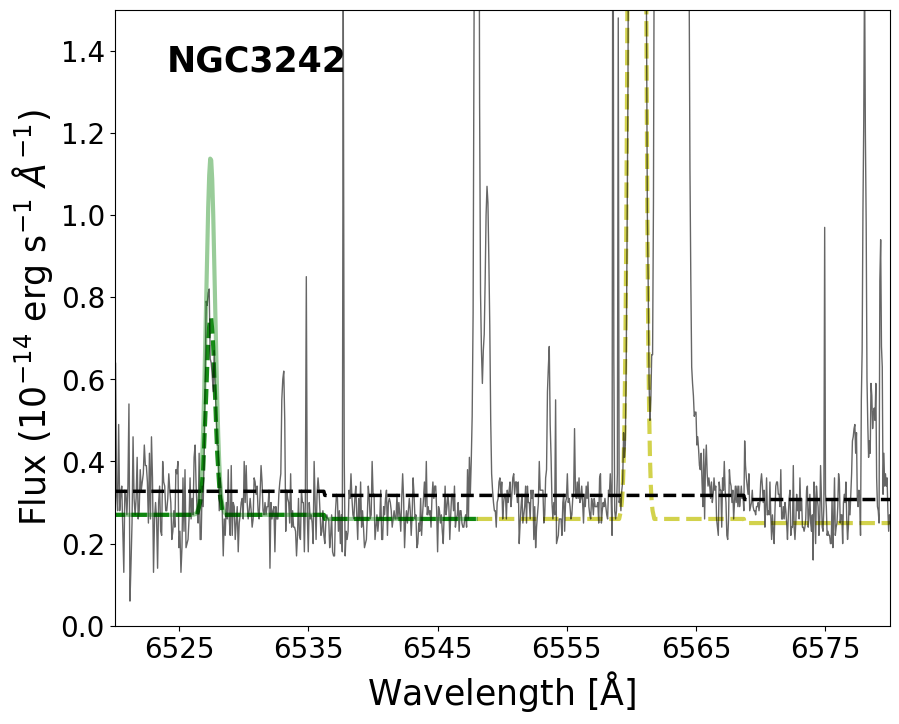

In [14]:
fig = plt.figure(1,figsize=(10,8))

name = 'NGC3242'
factor = 100
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength']
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux']*factor

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model']*factor

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model']*factor  +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model']*factor+globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model']*factor + globals()[f'F_c_{name}']
globals()[f'F_6584_1_{name}'] = globals()[f'paramter_{name}']['NII_6584_1_Model']*factor+ globals()[f'F_c_{name}']
globals()[f'F_6584_2_{name}'] = globals()[f'paramter_{name}']['NII_6584_2_Model']*factor+ globals()[f'F_c_{name}']



x_6527 = np.where(globals()[f'Model_lam_{name}'] <= 6548)[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6527],globals()[f'F_6527_{name}'][x_6527]/normal,'g--',alpha=0.9,lw=3)

x_6560 = np.where((globals()[f'Model_lam_{name}'] >= 6548))[0]
plt.plot(globals()[f'Model_lam_{name}'][x_6560 ],globals()[f'F_6560_{name}'][x_6560 ]/normal,'y--',alpha=0.7,lw=3)



Noise_level =globals()[f'F_c_{name}'] + (1.72e-15 * 1e12 *factor )/3 # 3sigma
plt.plot(globals()[f'Model_lam_{name}'],Noise_level,'k',linestyle='--',lw=2.5)



plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}'],'k-',alpha=0.6,lw=1)

plt.xlim(x_min,x_max)

# F_6560 =6.33E-13 / 5 * 1e12* factor
# lam_6560 =6530.34
# F_6560_sig = 1.20
# F_6527 = F_6560 / 21
# fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6560,F_6560_sig, globals()[f'F_c_{name}'] ) 
# plt.plot(globals()[f'Model_lam_{name}'], fit_6527,'g-',alpha=1,label='F6560/F6527 = 21 with 5 times less')
# print(fit_6527.max())
F_6560 =1.83E-13 * 1e12 * factor 
lam_6527 =6527.43
F_6560_sig = 0.34
F_6527 = F_6560 / 21
fit_6527 = Flux(F_6527,globals()[f'Model_lam_{name}'],lam_6527,F_6560_sig, globals()[f'F_c_{name}'] ) 
plt.plot(globals()[f'Model_lam_{name}'][x_6527], fit_6527[x_6527],'g-',alpha=0.4,lw=3)
print(fit_6527.max())

x_min,x_max = 6520,6580
plt.xlim(x_min,x_max)
plt.xticks(np.arange(6525,6585,10),fontsize=20)
y_max = globals()[f'F_6527_{name}'].max()/normal

plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.ylabel(r'Flux $(10^{-14}$ erg s$^{-1}$ $ \AA^{-1})$',fontsize=25)
plt.ylim(0.0,1.5)
plt.yticks(fontsize=20)

plt.text(6524,1.35,'NGC3242',size=25,fontweight='bold')
# plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/{name}_yes_6527.pdf',bbox_inches='tight')